# Load in packages

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tabulate import tabulate

In [2]:
# remove "future" warnings
warnings.simplefilter(action="ignore", category= FutureWarning)

# Read in dataset

In [3]:
df = pd.read_csv('Expanded_data_with_more_features.csv') # read in data
df = df.drop("Unnamed: 0", axis = 1)

<hr>

# <center>Objective 1</center>
## <center>Business Understanding:</center>

<hr>

###  <span style = "color:blue"> A) Describe the purpose of the data set you selected (why was it collected in the first place?).</span>

#### - The data (fictional) is comprised of scores from three tests of students at a public school along with a variety of personal and socio-economic factors which may contain interaction effects. <br><br>
#### - We assume that this data was collected to identitfy potential relationships between personal and socio-economic factors that could help to predict and better understand which factors affect test scores most. With this knowledge educators, parents and students can focus their attention towards variables which can potentially help students earn higher testing scores.  

###  <span style = "color:blue">B) Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset?</span>

#### - The importance of student education and testing scores are of the utmost importance. Education is the foundation upon which students will build their future on. If we are able to identify factors that could assist in making a more efficient learning and testing experiece it will impact the future positively for many students.<br><br>
#### - We will know if we have mined useful knowledge from the dataset if we are able to identify patterns and significant relationships that help us in identifying student performance factors.


### <span style = "color:blue">C) How would you measure the effectiveness of a good prediction algorithm? Be specific.</span>

#### - A good prediction algorithm will be one that not only allows us to accurately predict test scores for given inputs, but one that will allow us to obtain interpreable results that we can use to better understand to what extent each factor has an effect on testing scores. Understanding which key relationships that lie within our data will help staff, family, and students identify actionable opportunitites in which interventions and support can be provided.

<hr>

# <center>Objective 2</center>

## <center>Data Understanding</center>

<hr>

### Data Conversion

- Becuase we have many categorical variables... we will anticipate the need for a data conversion but keep a separate df so that can can explore changes between the two. 

In [4]:
# new dfs with/without object type
df_obj = df.select_dtypes(include = "object")
df_num = df.select_dtypes(exclude = "object")

# view levels of columns
for col in df_obj.columns:
    unique_values = df_obj[col].unique()
    print(f"Unique values in column '{col}':{unique_values}")

Unique values in column 'Gender':['female' 'male']
Unique values in column 'EthnicGroup':[nan 'group C' 'group B' 'group A' 'group D' 'group E']
Unique values in column 'ParentEduc':["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
Unique values in column 'LunchType':['standard' 'free/reduced']
Unique values in column 'TestPrep':['none' nan 'completed']
Unique values in column 'ParentMaritalStatus':['married' 'single' 'widowed' nan 'divorced']
Unique values in column 'PracticeSport':['regularly' 'sometimes' 'never' nan]
Unique values in column 'IsFirstChild':['yes' 'no' nan]
Unique values in column 'TransportMeans':['school_bus' nan 'private']
Unique values in column 'WklyStudyHours':['< 5' '5 - 10' '> 10' nan]


In [5]:
# creating dummy var for the object type df. 
# dropping first = True for multicollinearity dummy trap
df_obj = pd.get_dummies(df_obj, drop_first = True)

# combining into one df
new_df = pd.concat([df_num, df_obj], axis = 1)

# viewing new df. 
new_df

,NrSiblings,MathScore,ReadingScore,WritingScore,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentEduc_bachelor's degree,...,TestPrep_none,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_yes,TransportMeans_school_bus,WklyStudyHours_< 5,WklyStudyHours_> 10
0,3.0,71,71,74,0,0,0,0,0,1,...,1,1,0,0,1,0,1,1,1,0
1,0.0,69,90,88,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,4.0,87,93,91,0,1,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0
3,1.0,45,56,42,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0.0,76,78,75,1,0,1,0,0,0,...,1,1,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,2.0,59,61,65,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
30637,1.0,58,53,51,1,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
30638,1.0,61,70,67,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
30639,3.0,82,90,93,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


### <span style = "color:blue">A) Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.</span>

### Meaning / Description of Data: 
   **Gender**: Gender of the student (male/female)

   **EthnicGroup**: Ethnic group of the student (group A to E)

   **ParentEduc**: Parent(s) education background (from some_highschool to master's degree)

   **LunchType**: School lunch type (standard or free/reduced)

   **TestPrep**: Test preparation course followed (completed or none)

   **ParentMaritalStatus**: Parent(s) marital status (married/single/widowed/divorced)

   **PracticeSport**: How often the student parctice sport (never/sometimes/regularly))

   **IsFirstChild**: If the child is first child in the family or not (yes/no)

   **NrSiblings**: Number of siblings the student has (0 to 7)

   **TransportMeans**: Means of transport to school (schoolbus/private)

   **WklyStudyHours**: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)

   **MathScore**: math test score(0-100)

   **ReadingScore**: reading test score(0-100)

   **WritingScore**: writing test score(0-100)


###  Original (as-is) Data Types:
   **Gender**: object
   
   **EthnicGroup**: object
   
   **ParentEduc**: object
   
   **LunchType**: object
   
   **TestPrep**: object
   
   **ParentMaritalStatus**: object
   
   **PracticeSport**: object
   
   **IsFirstChild**: object
   
   **NrSiblings**: float64
   
   **TransportMeans**: object
   
   **WklyStudyHours**: object
   
   **MathScore**: int64
   
   **ReadingScore**: int64
   
   **WritingScore**:int64
    
       object = column containing a python object such as strings, lists, or dict.
       int64 = column containing integer values
       float64 = column containing floating-point values (decimal numbers)

### Scale/Values Etc:
   **Gender** (male/female)

   **Ethnic Group** (group A to E)

   **Parent Educ** (from some_highschool to master's degree)

   **Lunch Type** (standard or free/reduced)

   **Test Prep** (completed or none)

   **Parent Marital Status** (married/single/widowed/divorced)

   **Practice Sport** (never/sometimes/regularly)

   **Is First Child** (yes/no)

   **Nr Siblings** (0 to 7)

   **Transport Means** (schoolbus/private)

   **Wkly Study Hours** (less that 5hrs; between 5 and 10hrs; more than 10hrs)

   **Math Score** (0-100)

   **Reading Score** (0-100)

   **Writing Score** (0-100)

### <span style = "color:blue">B) Verify the data quality: 
    
- Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be. Specific.</span>

### - Missing Values:

   - The dataset contains many missing values at first glance. Upon further investigation, we found that many columns of data contain "nan".<br><br>    
   - The nan values are only in categorical variables and could likely be attributed to not having an answer that fits within the given reponses. It's hard to determine this since we have no information on how each response was gathered, and from who/how it was gathered.<br><br>      
   - The missing data will be handled on a case by case basis. 
   

### - Missing Values - Potential Reasonings:

   - **Ethnic Group**: This could be result of not fitting into Group A-E, or a choice to not provide the information. or truly missing data.<br><br>     
   - **Parent Edu**: This could be a result of not fitting into the specific groups (having a PhD for example), or a choice not to provide the information. or truly missing data.<br><br>      
   - **TestPrep**: This is likely to be a result of not fitting into the specific groups (maybe being "in progress", or "started"/"some"). The reasoning is that this is (likley) not a controversial or discriminatory question in nature and would leave us with a reasonable assumption. <br><br>         
   - **ParentMartitalStatus**: This is likely to be a result of choosing to not offer a response, or truly missing data. (additionally there is the potential for this to be due to not having the answer choice "never married" meaning the parents are together but never married.)<br><br>      
   - **Practice Sport**: This could be a result of not fitting into a specific group (there is no answer for "not in sports", or addressing other extra cirrcular activities, etc).<br><br>        
   - **Is First Child**: likley to be missing data? or twins / have a "step" sibling of same age?<br><br>  
   - **Transport Means**: can be missing data or likely to be result of not fitting into the specific group (no walking/biking option)<br><br> 
   - **Wkly Study Hours**: likely to be missing data since the scale of options is covered. <br><br> 
     

### - Missing Values - Proposed Solutions

   - **Ethnic Group**: nan = not_specified <br><br> 
   - **Parent Edu**: nan = not_specified <br><br> 
   - **Test Prep**: nan = not_specified <br><br> 
   - **Parent Martital Status**: nan = not_specified <br><br> 
   - **Practice Sport**: nan = not_specified *making up 2 percent of missing values it's possible we can drop the rows if we determine an adequate threshold of missing rows to be allowed for dropping.* <br><br> 
   - **Is First Child**:  *making up 2 percent of missing values it's possible we can drop the rows if we determine an adequate threshold of missing rows to be allowed for dropping.* <br><br> 
   - **Transport means**: nan = not_specified <br><br> 
   - **Wkly Study Hours**: nan = no_study? <br><br> 

In [6]:
# missing data
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [7]:
# percentage of missing data
100 * df.isnull().sum() / len(df)

Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
NrSiblings              5.130381
TransportMeans         10.228126
WklyStudyHours          3.116739
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64

In [8]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [9]:
percent_nan = percent_missing(df)

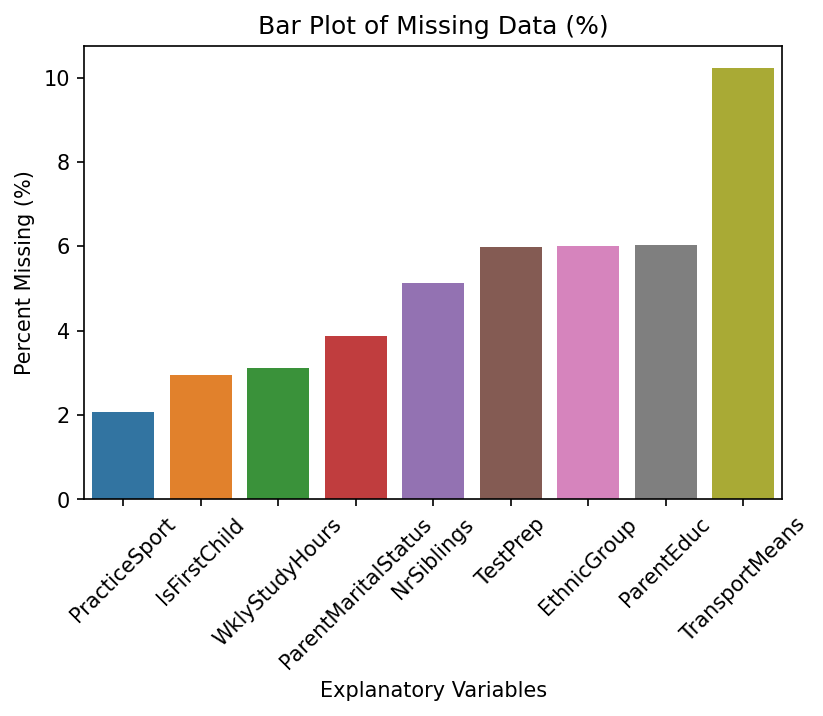

In [10]:
# plot of missing data (percentage) 
plt.figure(dpi = 150)
sns.barplot(x=percent_nan.index, y = percent_nan)
plt.title("Bar Plot of Missing Data (%)")
plt.xlabel("Explanatory Variables")
plt.ylabel("Percent Missing (%)")
plt.xticks(rotation = 45);

### Addressing NaNs

In [11]:
df.fillna("not specified", inplace = True)

### - Duplicate Data

We do not appear to have duplicated rows or columns in the data. While there may be certain values (such as scores) which are "duplicated" this is to be expected.

In [12]:
# viewing duplicated data rows/cols
duplicate_sum = df.duplicated().sum()
print("Total Duplicated Rows", duplicate_sum)

duplicate_sum_column = df.duplicated(). sum(axis =0)
print("Total Duplicated Columns", duplicate_sum_column)

Total Duplicated Rows 0
Total Duplicated Columns 0


### - Outliers

In [13]:
def find_IQR(df,x):
    # IQR
    Q1 = np.percentile(df[x], 25)
    Q3 = np.percentile(df[x], 75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

In [14]:
# Math IQR
Q1, Q3, IQR = find_IQR(df, "MathScore")

# Upper Bound
math_upper=Q3+1.5*IQR
mathupper_array=df[np.array(df["MathScore"]>=math_upper)]

mathupper_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


In [15]:
# Lower bound
math_lower=Q1-1.5*IQR
mathlower_array=df[np.array(df["MathScore"]<=math_lower)]

mathlower_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
17,female,group B,some high school,free/reduced,none,divorced,sometimes,yes,1.0,school_bus,5 - 10,18,32,28
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
136,female,group C,some college,free/reduced,none,single,regularly,yes,1.0,school_bus,< 5,21,38,33
319,female,group B,some high school,free/reduced,none,single,sometimes,no,3.0,school_bus,< 5,23,37,26
751,female,group B,some college,standard,none,single,regularly,no,4.0,private,< 5,18,37,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28544,female,group C,some college,free/reduced,none,single,sometimes,yes,3.0,private,not specified,11,39,34
28597,female,group D,high school,free/reduced,completed,married,sometimes,yes,2.0,school_bus,> 10,9,32,32
29000,male,group A,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,< 5,21,18,21
29654,female,group B,associate's degree,free/reduced,none,single,sometimes,no,4.0,private,5 - 10,19,41,34


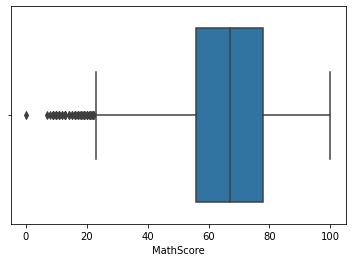

In [16]:
sns.boxplot(df["MathScore"])
plt.show()

In [17]:
# Reading IQR
Q1, Q3, IQR = find_IQR(df, "ReadingScore")

# Upper Bound
reading_upper=Q3+1.5*IQR
readingupper_array=df[np.array(df["ReadingScore"]>=reading_upper)]

readingupper_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


In [18]:
# Lower bound
reading_lower=Q1-1.5*IQR
readinglower_array=df[np.array(df["ReadingScore"]<=reading_lower)]

readinglower_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
69,male,group E,some high school,standard,none,not specified,sometimes,no,5.0,school_bus,5 - 10,28,25,21
308,male,group A,some college,free/reduced,none,married,regularly,yes,2.0,school_bus,> 10,29,23,19
565,male,group B,high school,free/reduced,none,married,regularly,no,2.0,school_bus,5 - 10,30,24,15
928,female,group B,high school,free/reduced,none,married,sometimes,yes,1.0,private,5 - 10,8,24,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28698,male,group C,associate's degree,free/reduced,none,married,sometimes,no,1.0,not specified,5 - 10,27,26,23
29000,male,group A,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,< 5,21,18,21
30389,male,group B,associate's degree,free/reduced,none,divorced,never,no,1.0,school_bus,5 - 10,24,14,4
30412,male,group C,some high school,free/reduced,none,single,regularly,no,not specified,private,5 - 10,33,25,29


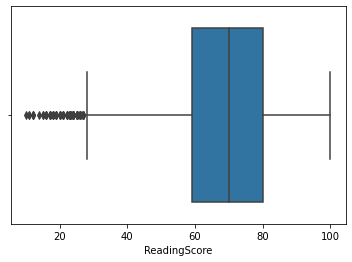

In [19]:
sns.boxplot(df["ReadingScore"])
plt.show()

In [20]:
# Writing IQR
Q1, Q3, IQR = find_IQR(df, "WritingScore")

# Upper Bound
write_upper=Q3+1.5*IQR
writeupper_array=df[np.array(df["WritingScore"]>=write_upper)]

writeupper_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


In [21]:
# Lower bound
write_lower=Q1-1.5*IQR
writelower_array=df[np.array(df["WritingScore"]<=write_lower)]

writelower_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
69,male,group E,some high school,standard,none,not specified,sometimes,no,5.0,school_bus,5 - 10,28,25,21
308,male,group A,some college,free/reduced,none,married,regularly,yes,2.0,school_bus,> 10,29,23,19
319,female,group B,some high school,free/reduced,none,single,sometimes,no,3.0,school_bus,< 5,23,37,26
565,male,group B,high school,free/reduced,none,married,regularly,no,2.0,school_bus,5 - 10,30,24,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29274,female,group E,some college,free/reduced,none,not specified,sometimes,no,1.0,school_bus,5 - 10,30,32,26
29817,male,group D,high school,free/reduced,none,married,sometimes,no,1.0,private,5 - 10,33,31,22
30389,male,group B,associate's degree,free/reduced,none,divorced,never,no,1.0,school_bus,5 - 10,24,14,4
30478,male,group D,associate's degree,standard,none,married,sometimes,no,1.0,school_bus,< 5,32,19,20


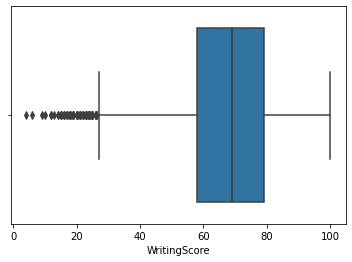

In [22]:
sns.boxplot(df["WritingScore"])
plt.show()

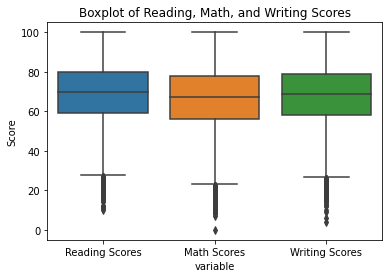

In [23]:
# Create a DataFrame of the scores
scores_df = df[["ReadingScore", "MathScore", "WritingScore"]]

# Melt the DataFrame to "long-form" format
scores_melt = pd.melt(scores_df)

# Create the boxplot using Seaborn
sns.boxplot(x="variable", y="value", data=scores_melt)

# Add labels to the x-axis ticks
plt.xticks([0, 1, 2], ["Reading Scores", "Math Scores", "Writing Scores"])

# Add labels to the y-axis
plt.ylabel("Score")

# Add a title
plt.title("Boxplot of Reading, Math, and Writing Scores")

# Display the plot
plt.show()


While there are a number of outliers and one notable one is 0 in Math Score, we have decided that it wouldn't make any sense to remove any of them because we believe that every single value in each of these score columns are rather important.

Therefore, we want to keep the dataset as it is for now. 

### <span style = "color:blue">C) Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found somthing interesting.</span> <br><br> 
### <span style = "color:blue">Explain the significance of the statistics run and why they are meaniningful.</span>

In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MathScore,30641.0,66.558402,15.361616,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.377533,14.758952,10.0,59.0,70.0,80.0,100.0
WritingScore,30641.0,68.418622,15.443525,4.0,58.0,69.0,79.0,100.0


### Metrics Defined

   - **Range**: The range is the difference between the highest and the lowest values in a dataset. It gives an indication of how spread out the data is. <br><br>
   - **Mode**: The mode is the value that appears most frequently in a dataset. It represents the most common or typical value in the data. <br><br> 
   - **Mean**: The mean is the average of all values in a dataset. It is calculated by summing up all the values and dividing by the number of values. <br><br>
   - **Median**: The median is the middle value of a dataset when it is ordered from lowest to highest (or highest to lowest). It is used as a measure of central tendency when the dataset contains outliers or is not normally distributed. <br><br>
   - **Standard Deviation**: The standard deviation is a measure of the spread or dispersion of a dataset. It represents how much the values in a dataset vary from the mean. A higher standard deviation indicates a larger spread of the data. <br><br> 
   - **Min**: The minimum value is the smallest value in a dataset.<br><br> 
   - **25%**: The 25th percentile, also known as the first quartile, is the value below which 25% of the data falls. <br><br> 
   - **50%**: The 50th percentile, also known as the median, is the middle value of the dataset. <br><br> 
   - **75%**: The 75th percentile, also known as the third quartile, is the value below which 75% of the data falls. <br><br> 
   - **Max**: The maximum value is the largest value in a dataset.<br><br> 
   - **Count**: The count is the total number of values in a dataset.<br><br> 

### Calculated Metrics For Our Data

In [25]:
# Calculate the statistics using describe()
reading_stats = df["ReadingScore"].describe()
math_stats = df["MathScore"].describe()
writing_stats = df["WritingScore"].describe()

# Calculate the mode separately
reading_mode = df["ReadingScore"].mode()
math_mode = df["MathScore"].mode()
writing_mode = df["WritingScore"].mode()

# Add the mode to the statistics DataFrame
reading_stats["Mode"] = reading_mode[0]
math_stats["Mode"] = math_mode[0]
writing_stats["Mode"] = writing_mode[0]

# Combine the statistics into a single DataFrame
stats_df = pd.DataFrame({"Reading Score": reading_stats,
                         "Math Score": math_stats,
                         "Writing Score": writing_stats})

# Convert the DataFrame to a visual table
table = tabulate(stats_df, headers='keys', tablefmt='fancy_grid')

# Print the table
print(table)


╒═══════╤═════════════════╤══════════════╤═════════════════╕
│       │   Reading Score │   Math Score │   Writing Score │
╞═══════╪═════════════════╪══════════════╪═════════════════╡
│ count │      30641      │   30641      │      30641      │
├───────┼─────────────────┼──────────────┼─────────────────┤
│ mean  │         69.3775 │      66.5584 │         68.4186 │
├───────┼─────────────────┼──────────────┼─────────────────┤
│ std   │         14.759  │      15.3616 │         15.4435 │
├───────┼─────────────────┼──────────────┼─────────────────┤
│ min   │         10      │       0      │          4      │
├───────┼─────────────────┼──────────────┼─────────────────┤
│ 25%   │         59      │      56      │         58      │
├───────┼─────────────────┼──────────────┼─────────────────┤
│ 50%   │         70      │      67      │         69      │
├───────┼─────────────────┼──────────────┼─────────────────┤
│ 75%   │         80      │      78      │         79      │
├───────┼───────────────

  **Range:** The range of Reading Score, Math Score, and Writing Score can provide an idea of how spread out the scores are and the variability of the performance of students in these subjects.<br><br> 
   **Mode:** The mode of Reading Score, Math Score, and Writing Score can provide an idea of the most common score achieved by students in these subjects, which can be useful for identifying areas of strength and weakness.<br><br> 
   **Mean:** The mean of Reading Score, Math Score, and Writing Score can provide an idea of the average performance of students in these subjects, which can be useful for comparing the performance of different groups of students.<br><br> 
   **Median:** The median of Reading Score, Math Score, and Writing Score can provide an idea of the central tendency of the scores, which can be useful for identifying outliers and extreme values that may skew the mean.<br><br> 
   **Standard Deviation:** The standard deviation of Reading Score, Math Score, and Writing Score can provide an idea of the spread of the scores around the mean, which can be useful for identifying the variability of the performance of students in these subjects.<br><br> 
   **Min:** The minimum score of Reading Score, Math Score, and Writing Score can provide an idea of the lowest score achieved by students in these subjects.<br><br> 
   **25%, 50%, and 75%**: The quartiles of Reading Score, Math Score, and Writing Score can provide an idea of the spread and distribution of the scores, which can be useful for identifying the performance of students in different percentile ranges.<br><br> 
   **Max:** The maximum score of Reading Score, Math Score, and Writing Score can provide an idea of the highest score achieved by students in these subjects.<br><br> 
   **Count**: The count of Reading Score, Math Score, and Writing Score can provide an idea of the sample size of students who took the test in each subject, which can be useful for making inferences about the population of students.<br><br>     
   **Summary**: By analyzing these statistics for Reading Score, Math Score, and Writing Score, educators, researchers, and policymakers can gain insights into the performance of students in these subjects and identify areas of improvement. For example, if the mean score for Reading Score is significantly lower than the mean score for Math Score and Writing Score, educators may need to focus more on improving the reading skills of students. Similarly, if the standard deviation of Math Score is significantly higher than the standard deviation of Reading Score and Writing Score, policymakers may need to investigate the reasons behind the variability of the performance of students in Math Score and implement interventions to address the issue.<br><br> 

### <span style = "color:blue">D) Visualize the most important attributes appropriately (at least 5). </span>
 
 *provide an interpretation for each chart*

  *explain why each visual is appropriate.* 

### 1) Gender / Test Score Visualization

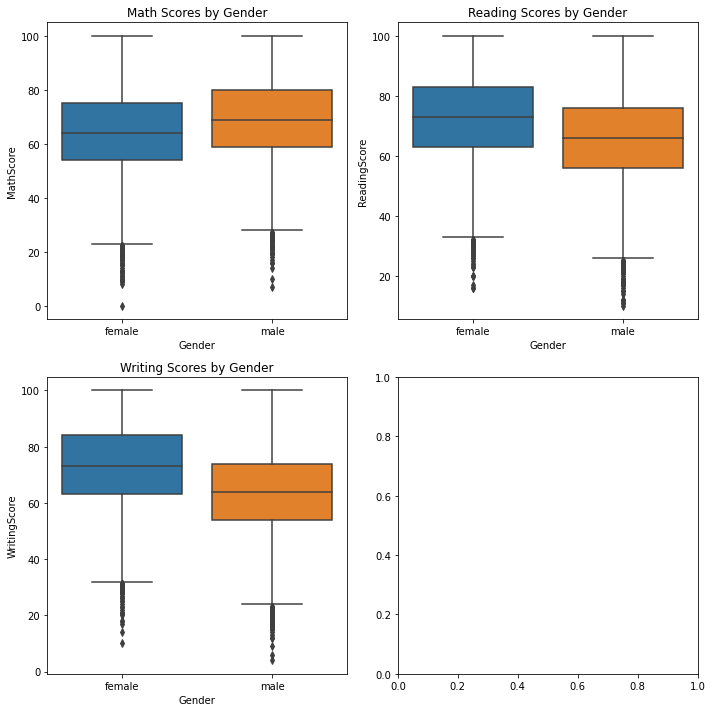

In [26]:
# create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# create boxplots for each variable within each subplot
sns.boxplot(ax=axes[0, 0], data=df, x='Gender', y='MathScore')
sns.boxplot(ax=axes[0, 1], data=df, x='Gender', y='ReadingScore')
sns.boxplot(ax=axes[1, 0], data=df, x='Gender', y='WritingScore')

# add titles to each subplot
axes[0, 0].set_title('Math Scores by Gender')
axes[0, 1].set_title('Reading Scores by Gender')
axes[1, 0].set_title('Writing Scores by Gender')

# adjust subplot spacing
plt.tight_layout()

# show the plot
plt.show()

Gender has a relativley strong postive correlation with Math Score and a relatively strong negative correlation with both reading and writing scores. 
<br><br>

The boxplot above illustrates the distribution of test score and shows the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data. 
<br><br>

A boxplot is an appropriate visual for comparing male and female test scores because it provides a clear and concise summary of the distribution of the data for each group. By plotting the boxplots side by side, we can easily compare the central tendency, spread, and skewness of the test scores for males and females. Additionally, boxplots can effectively display potential outliers and extreme values in the data, which can be helpful in identifying differences between the two groups. Overall, boxplots can provide a useful visual summary of the distribution of the data and help us compare the performance of males and females on the test scores.

### 2) Parent Educ. / Test Score Visualization

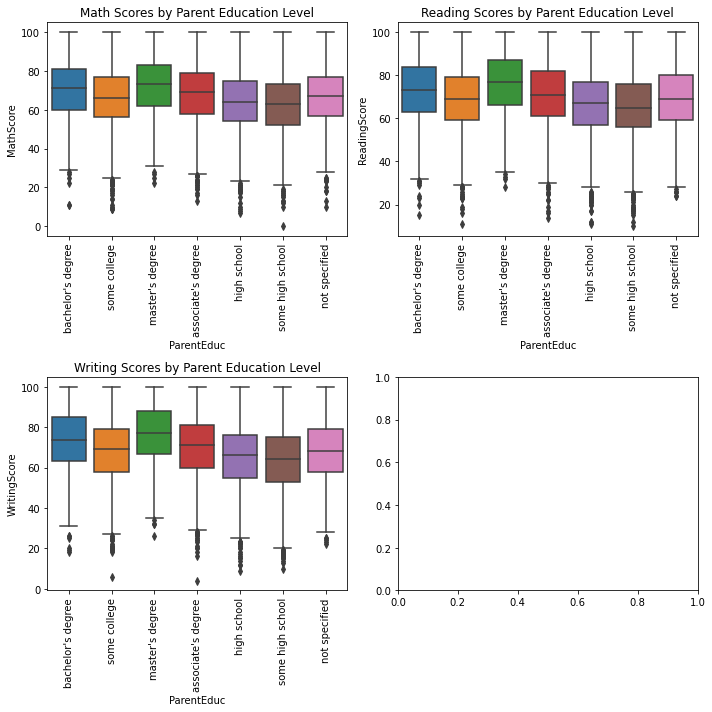

In [27]:
# create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# create boxplots for each variable within each subplot
sns.boxplot(ax=axes[0, 0], data=df, x='ParentEduc', y='MathScore')
sns.boxplot(ax=axes[0, 1], data=df, x='ParentEduc', y='ReadingScore')
sns.boxplot(ax=axes[1, 0], data=df, x='ParentEduc', y='WritingScore')

# customize x-axis tick labels for each subplot
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# add titles to each subplot
axes[0, 0].set_title('Math Scores by Parent Education Level')
axes[0, 1].set_title('Reading Scores by Parent Education Level')
axes[1, 0].set_title('Writing Scores by Parent Education Level')

# adjust subplot spacing
plt.tight_layout()

# show the plot
plt.show()

Parent Eduction Level has notable negative and positive correlative relationships with each of the subject test scores. 
<br><br>
The boxplot above illustrates the distribution of test score and shows the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data. 
<br><br>
A box plot is a good visual for comparing education levels against test scores because it displays the distribution of scores for each level of education in a compact and intuitive way. The box represents the interquartile range (IQR) of the data, with the median (50th percentile) represented as a horizontal line inside the box. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, while any data points outside this range are represented as individual dots. This allows for easy comparison of the distribution of test scores for different levels of education, as well as identifying potential outliers or extreme values.
<br><br>
In the case of comparing education levels against test scores, a box plot allows for quick identification of any differences or similarities in the distribution of scores for each level of education. It can also reveal the range and skewness of the data, as well as any potential outliers or extreme values. Additionally, box plots can be easily compared across different groups or variables, allowing for more comprehensive and informative data analysis.

### 3) Ethnic Group / Test Score Visualization

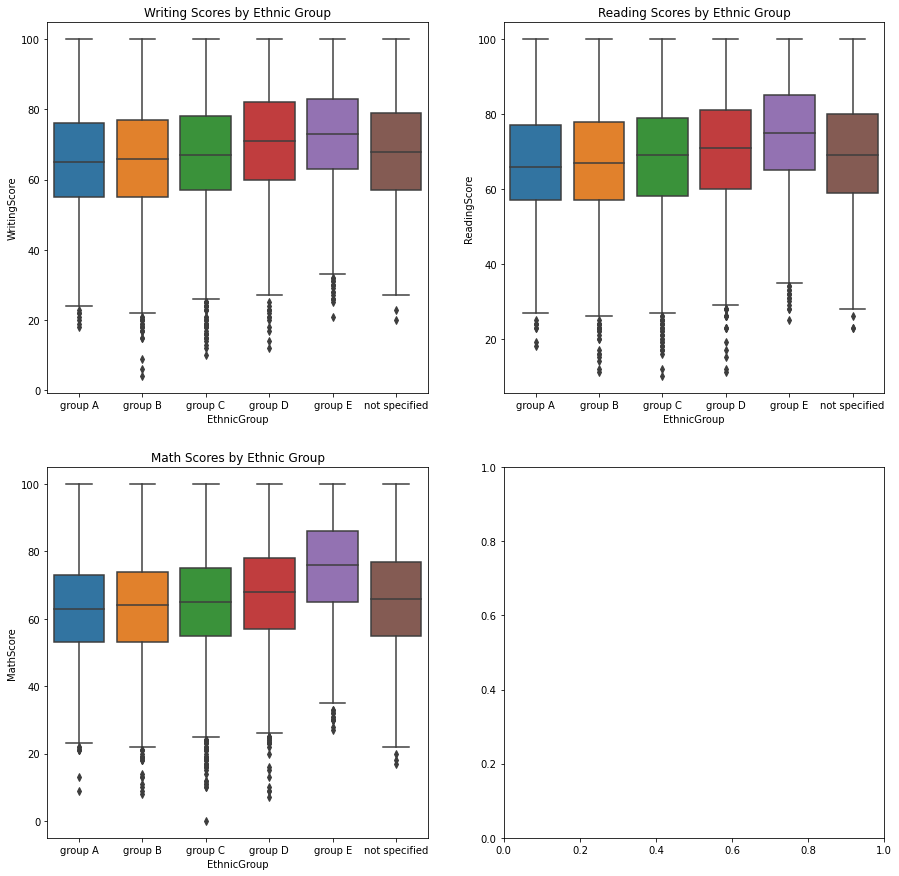

In [28]:
# Reorder EthnicGroup col
df['EthnicGroup'] = df['EthnicGroup'].astype('category')
df["EthnicGroup"].cat.reorder_categories(["group A","group B", "group C", "group D", "group E", "not specified"])

fig, axes = plt.subplots(nrows= 2, ncols = 2, figsize = (15,15))

sns.boxplot(ax = axes[0,0], data = df, x = "EthnicGroup", y = "WritingScore")
sns.boxplot(ax = axes[0,1], data = df, x = "EthnicGroup", y = "ReadingScore")
sns.boxplot(ax=axes[1,0], data = df, x = "EthnicGroup", y = "MathScore")

axes[0,0].set_title("Writing Scores by Ethnic Group")
axes[0,1].set_title("Reading Scores by Ethnic Group")
axes[1,0].set_title("Math Scores by Ethnic Group")


plt.show()

When looking at the impact of Ethnic Group on the exam scores, we find that there are some correlative relationship with each of the subject test scores. 

Same as the last visualization, a boxplot is a wonderful comparing ethnic group against test scores because it displays the distribution of scores for each ethnic group in a compact and intuitive way. As seen above, while those Group A-C and those who didn't specify their ethnicity generally have the same boxplot, we find that those in group D & E have a higher median score than the rest. The highest is group E. Another interesting discovery to note is the number of outliers in group C.

### 4) Lunch Type / Test Score Visualization

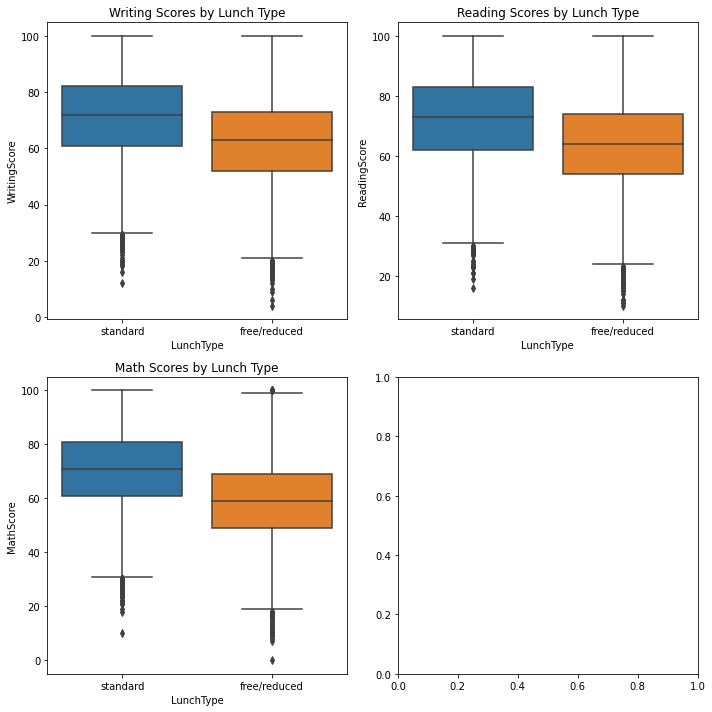

In [29]:
# create 2x2 subplot 
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

# create boxplot for each var within each plot
sns.boxplot(ax = axes[0,0], data = df, x = "LunchType", y = "WritingScore")
sns.boxplot(ax = axes[0,1], data = df, x = "LunchType", y = "ReadingScore")
sns.boxplot(ax = axes[1,0], data = df, x= "LunchType", y = "MathScore")

# add titles
axes[0,0].set_title("Writing Scores by Lunch Type")
axes[0,1].set_title("Reading Scores by Lunch Type")
axes[1,0].set_title("Math Scores by Lunch Type")

plt.tight_layout()

plt.show()

Once again, we are going to use the boxplot to look for relationship between test scores and Lunch Type. 

As we can see above, we find that those with standard generally have higher test scores across the board that those with free/reduced lunch. This seems to indicate that those with financial trouble seem to do poorly on exams. 

### 5) Test Prep / Test Score Visualization

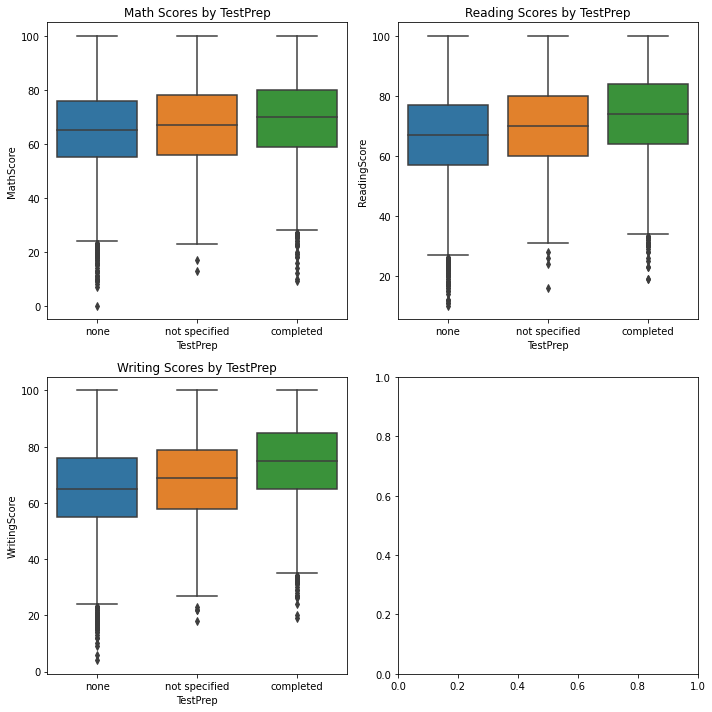

In [30]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

sns.boxplot(ax=axes[0,0], data = df, x = "TestPrep", y = "MathScore")
sns.boxplot(ax = axes[0,1], data = df, x = "TestPrep", y = "ReadingScore")
sns.boxplot(ax=axes[1,0], data = df, x = "TestPrep", y = "WritingScore")

axes[0,0].set_title("Math Scores by TestPrep")
axes[0,1].set_title("Reading Scores by TestPrep")
axes[1,0].set_title("Writing Scores by TestPrep")

plt.tight_layout()

plt.show()

This time we want to use the boxplot to look for any relationshp between TestPrep and the exam scores. 

As expected, those who have completed their test prep have a higher median score than those who did none of the test prep. Those who didn't specify has the 2nd highest median score and the fewest outliers. It's a little difficult to draw any sort of conclusion to this since we don't know how much of the test prep they did(they might've done some, none or all of the testprep).

### 6) ParentMaritalStatus / Test Score Visualization

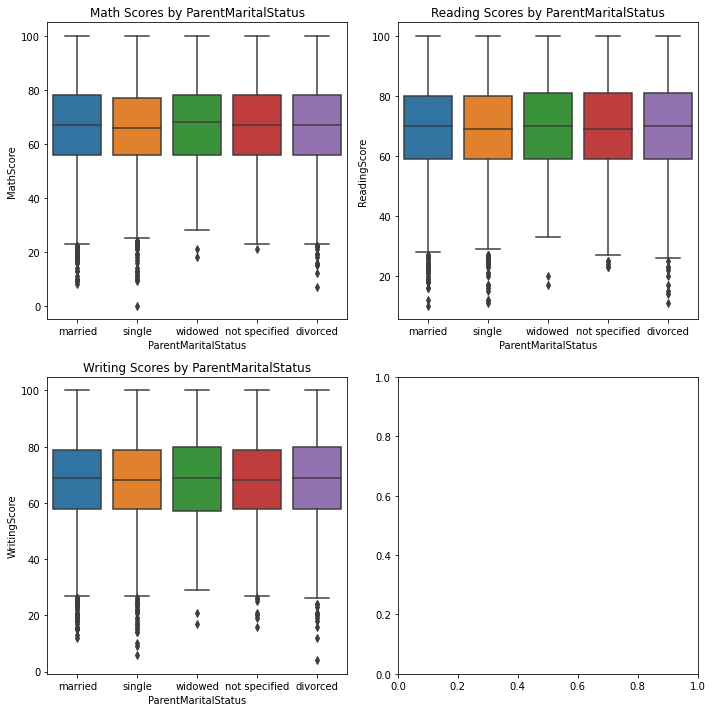

In [31]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

sns.boxplot(ax=axes[0,0], data = df, x = "ParentMaritalStatus", y = "MathScore")
sns.boxplot(ax = axes[0,1], data = df, x = "ParentMaritalStatus", y = "ReadingScore")
sns.boxplot(ax=axes[1,0], data = df, x = "ParentMaritalStatus", y = "WritingScore")

axes[0,0].set_title("Math Scores by ParentMaritalStatus")
axes[0,1].set_title("Reading Scores by ParentMaritalStatus")
axes[1,0].set_title("Writing Scores by ParentMaritalStatus")

plt.tight_layout()

plt.show()

Using the boxplot again, we can see that the Parent Marital Status seem to have very little effect on the exam grade that a student scores. 

### 7) WklyStudyHours/ Test Score Visualization

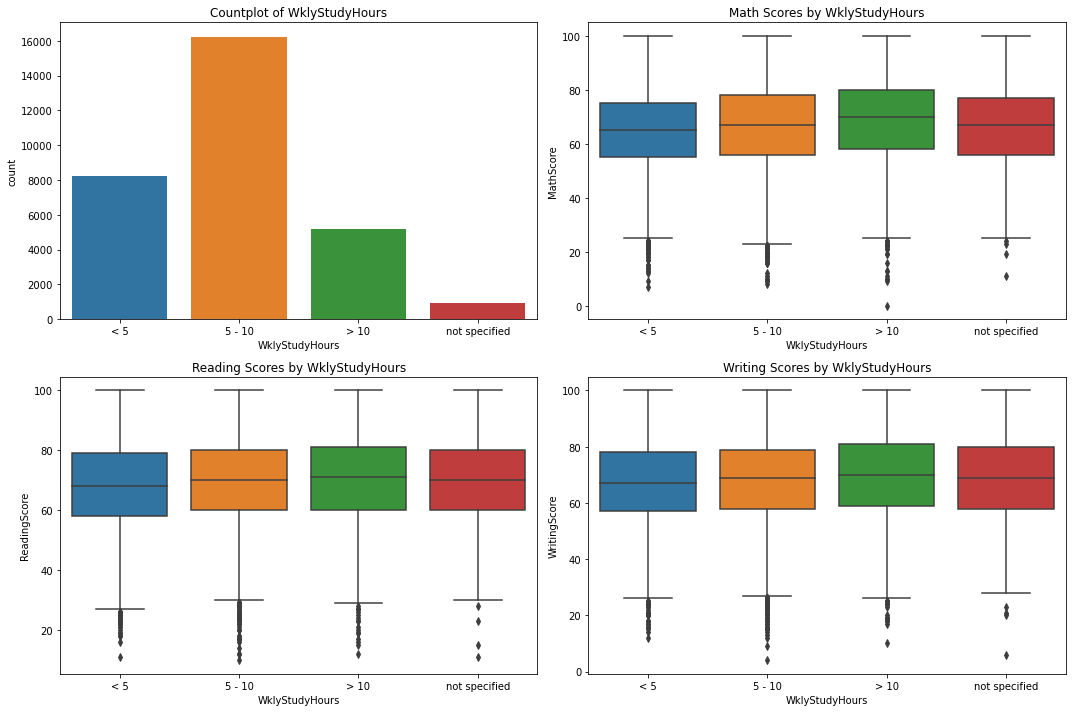

In [58]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

sns.countplot(ax=axes[0,0], x='WklyStudyHours', data=df)
sns.boxplot(ax=axes[0,1], data = df, x = "WklyStudyHours", y = "MathScore")
sns.boxplot(ax = axes[1,0], data = df, x = "WklyStudyHours", y = "ReadingScore")
sns.boxplot(ax=axes[1,1], data = df, x = "WklyStudyHours", y = "WritingScore")

axes[0,0].set_title("Countplot of WklyStudyHours")
axes[0,1].set_title("Math Scores by WklyStudyHours")
axes[1,0].set_title("Reading Scores by WklyStudyHours")
axes[1,1].set_title("Writing Scores by WklyStudyHours")

plt.tight_layout()

plt.show()

As we can see from our count plot, most of the students study about 5-10 hours every week and the second highest studies less than 5 hours every week. 

When we look at reading and writing score, we do not see much of a difference in the median score regardless of the number of hours studied. However, we see a slight uptick in the median in math score for those who've studied more than 10 hours. 

### <span style = "color:blue"> E & F) Explore relationships between attributes: look at the attributes via scatterplot, correlation, cross-tabulation, group-wise averages, etc. as appropriate. <br><br>Identify and explain interesting relationships between features and the class you are trying to predict. (i.e., relationships with variables and the target classification.)</span>

*explain any interesting relationships*

### Ethnic Group / Test Score Relationship

In [63]:
df.groupby("EthnicGroup")["MathScore"].mean()

EthnicGroup
group A          62.991888
group B          63.490216
group C          64.695723
group D          67.666400
group E          75.298936
not specified    66.185870
Name: MathScore, dtype: float64

In [64]:
df.groupby("EthnicGroup")["ReadingScore"].mean()

EthnicGroup
group A          66.787742
group B          67.320460
group C          68.438233
group D          70.382247
group E          74.251423
not specified    68.915761
Name: ReadingScore, dtype: float64

In [65]:
df.groupby("EthnicGroup")["WritingScore"].mean()

EthnicGroup
group A          65.251915
group B          65.895125
group C          66.999240
group D          70.890844
group E          72.677060
not specified    67.900543
Name: WritingScore, dtype: float64

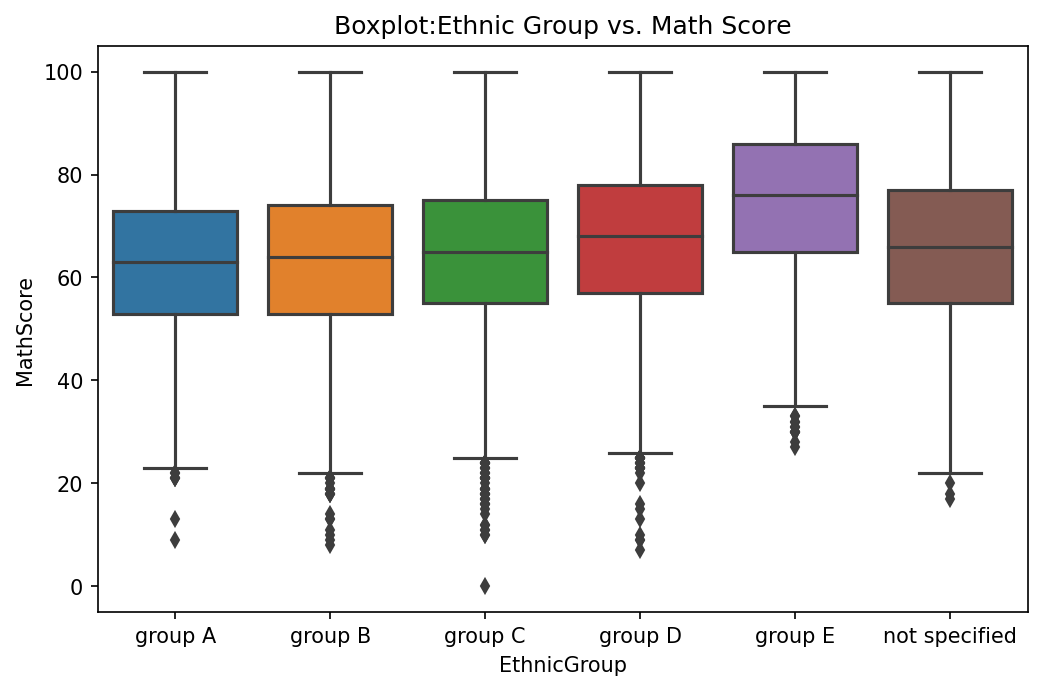

In [67]:
# Reorder EthnicGroup col
df['EthnicGroup'] = df['EthnicGroup'].astype('category')
df["EthnicGroup"].cat.reorder_categories(["group A","group B", "group C", "group D", "group E", "not specified"])

# Visualize Boxplot
plt.figure(figsize= (8,5), dpi = 150)
sns.boxplot(data = df , x = "EthnicGroup", y = "MathScore")
plt.title("Boxplot: Ethnic Group vs. Math Score")
plt.show()

An interesting relationship that we found in this section and the last was one between Ethnic Group and Exam Scores. 

Across all of the different means that we've calculated, we find that Group E has the highest: 75.3(Math Score), 74.3(Reading Score) and 72.7(Writing Score). Group D has the second highest across the board while all the other groups have roughly the same exam scores with a difference no larger than 2. 

### WklyStudyHours / Test Score Relationship

In [59]:
df.groupby("WklyStudyHours")["MathScore"].mean()

WklyStudyHours
5 - 10           66.870491
< 5              64.580359
> 10             68.696655
not specified    66.664921
Name: MathScore, dtype: float64

In [60]:
df.groupby("WklyStudyHours")["ReadingScore"].mean()

WklyStudyHours
5 - 10           69.660532
< 5              68.176135
> 10             70.365436
not specified    69.545550
Name: ReadingScore, dtype: float64

In [62]:
df.groupby("WklyStudyHours")["WritingScore"].mean()

WklyStudyHours
5 - 10           68.636280
< 5              67.090192
> 10             69.777778
not specified    68.771728
Name: WritingScore, dtype: float64

As found in our last section, we found that there is a notable difference in math score for those between those who study more than 10 hours than those who study less or are not specified. One interesting thing to note is the how big the difference is between the mean scores of each exams when grouping them by study hours. We find that the difference for the math scores is close to 2 when the others barely reach 1. 

Therefore, we might find the number of study hours have a greater effect on the math score than that of reading and writing.

### Gender / Test Score Relationship

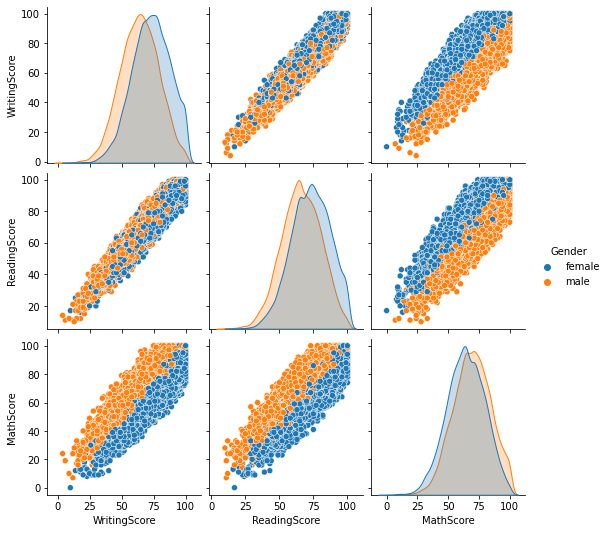

In [68]:
sns.pairplot(df[["WritingScore", "ReadingScore","MathScore", "Gender"]], hue= "Gender")
plt.show()

finally, we want to use the pairplot to visualize the different test scores between gender. 

Looking at the density plot, we can see that the female population scored higher than the male in Reading and Writing. The male seemed to score higher on Math. This conclusion was drawn because the plot is slightly to the right of the opposing gender. 

Looking at the scatterplot, we see an interesting relationship between MathScore vs. Writing & Reading Score, which seems to affirm our finding in the density plot. We can see a clear divide in the scatterplots between the two genders. If we put MathScore on the x-axis, we find that male occupy the bottom half of our plot. If we switch MathScore to the y-axis, we find that make occupy the top-half, which indicates that they generally score higher than the female in the subject. 

### Correlation Heatmaps of All Variables

In [ ]:
# raw data corr viz. 
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df.corr(), cmap = "mako", annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(12,10), dpi=200)
sns.heatmap(new_df.corr(),cmap = "magma", linecolor='white', linewidths=1)

In [ ]:
new_df.corr()["WritingScore"].sort_values()

When determining Writing Score with correlation, we find that there are several factors that can help us. 

Firstly, the strongest relationships with the Writing scores are the other two exam scores(Math & Reading). Everything else can be calssified as weak since their correlation is between 0.25 and 0.5(negative and positive). Some weak relationships that stands out are the gender(male) at -0.289312, TestPrep(none) at -0.272412 and LunchType(standard) at 0.274305. 

This seems to affirm our findings in the previous section when we created boxplot to explore any relationship between these variables with the Writing Score.

In [ ]:
new_df.corr()["ReadingScore"].sort_values()

The Reading Score seems to tell the same story where Math and Writing Scores have the highest/strongest correlation. 

The other weak variables are the same, but should be given attention to, even though their values are a little different. We have: Gender(male) at -0.237097, TestPrep(none) at -0.199392 and LunchType(standard) at 0.258152. 

In [ ]:
new_df.corr()["MathScore"].sort_values()

The Math Score correlation is slightly different from our previous two. A couple of similairities between this and the previous two are that the other two exams have the highest correlation with our interested variable. 

Next, we find that some weak relationship that should be paid attention to are: LunchType(standard) at 0.367942, EthnicGroup(E) at 0.221775, Gender(male) at 0.162391 and, if we want to add a weaker link, we can explore TestPrep(none) at -0.132543.

### <span style = "color:blue">G) Are there other features that could be added to the data or created from existing features? which ones?</span> 

**Features that could be added to the data:**
1) School (or geographic location/district)<br><br> 
2) Teacher (or class) <br><br> 
3) Extracurricular Activities (other than sport specifically)<br><br> 
4) Parent Household Income<br><br> 
5) Work with Tutor<br><br> 
6) Teacher offers tutoring<br><br> 
7) Age<br><br> 
8) Participant in "student government" <br><br> 
9) Parent participation in PTA<br><br> 
10) Class or school average GPA<br><br> 
11) Student GPA<br><br> 

**Features that can be created from existing features:**
1) Column "Has Siblings" can be created with "only child" or "sibling" as attributes if a student has no siblings/has siblings as reported by nrsiblings<br><br> 
2) Pass/Fail for Math/Reading/Writing can be created by creating levels of score data (>=70 : pass, <70 : Fail) <br><br> 
*These two will be added below and are not very insightful likely because they are variables derived from pretty similar relationships vs if we were to create a new variable by comuptation or merging.*

In [ ]:
# create a function for the mentioned feature above
def pass_fail(score):
    if score >= 70:
        return "Pass"
    else:
        return "Fail"

In [ ]:
new_df["MathResult"] = new_df["MathScore"].apply(pass_fail)


In [ ]:
new_df["ReadingResult"] = new_df["ReadingScore"].apply(pass_fail)


In [ ]:
new_df["WritingResult"] = new_df["WritingScore"].apply(pass_fail)


In [ ]:
# new dfs with/without object type
df_obj = new_df.select_dtypes(include = "object")
df_num = new_df.select_dtypes(exclude = "object")

In [ ]:
# view levels of columns
for col in df_obj.columns:
    unique_values = df_obj[col].unique()
    print(f"Unique values in column '{col}':{unique_values}")
    

In [ ]:
    # creating dummy var for the object type df. 
# dropping first = True for multicollinearity dummy trap
df_obj = pd.get_dummies(df_obj, drop_first = True)


In [ ]:
# combining into one df
new_df = pd.concat([df_num, df_obj], axis = 1)

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(new_df.corr(),cmap = "magma", linecolor='white', linewidths=.5, annot=True)
plt.show()

In [ ]:
def has_siblings(nrsiblings):
    if nrsiblings == 0:
        return "only child"
    else:
        return "siblings"

In [ ]:
new_df["HasSiblings"] = df["NrSiblings"].apply(has_siblings)

In [ ]:
# new dfs with/without object type
df_obj = new_df.select_dtypes(include = "object")
df_num = new_df.select_dtypes(exclude = "object")

In [ ]:
# view levels of columns
for col in df_obj.columns:
    unique_values = df_obj[col].unique()
    print(f"Unique values in column '{col}':{unique_values}")
    

In [ ]:
# creating dummy var for the object type df. 
# dropping first = True for multicollinearity dummy trap
df_obj = pd.get_dummies(df_obj, drop_first = True)


In [ ]:
# combining into one df
new_df = pd.concat([df_num, df_obj], axis = 1)

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(new_df.corr(),cmap = "magma", linecolor='white', linewidths=.5, annot=True)
plt.show()

In this section, we can see that there really isn't much we can do to change the results. Most of the correlations are either very weak and the overall variables and its relationship with our reponse variable are the same as our previous section. 

At most, we can see that whether or not an idividual passes a specific exam is correlated to the score of our reponse variable. However, this might redundant since we can achieve the same result with our original variables(MathScore, WritingScore, ReadingScore).

<hr>

## <center>BONUS</center>

<hr>

### <span style = "color:blue">Provide Additional Analyses.</span> 
*one idea: implement dimensinoality reduction, then visualize and interpret the results.*
#### <span style = "color:red">*Note, PCA was attempted but it was not very useful/beneficial. This is likely becaue the data we are working with is mostly categorical variables and even though the variables have been encoded (one-hot) PCA was not meant to work with this type of data. MCA would be a more effective alternative, but we must understand that we lose the interpretation that we would have had with PCA variables. </span>

### MCA (Multiple Correspondence Analysis)

In [ ]:
#!pip install prince
import prince

In [ ]:
df = pd.read_csv('Expanded_data_with_more_features.csv') # read in data
df = df.drop("Unnamed: 0", axis = 1)

In [ ]:
df.head()

In [ ]:
# drop missing values to test mca
df = df.dropna()

In [ ]:
df = df.drop(["MathScore","ReadingScore","WritingScore","NrSiblings","Gender","LunchType","TestPrep","IsFirstChild",
             "TransportMeans", "ParentEduc"], axis = 1)

In [ ]:
# remove response var and int. col from df1
#df = df.drop(["MathScore","ReadingScore","WritingScore", "NrSiblings"], axis = 1)

In [ ]:
# get types as category
df = df.astype("category")

In [ ]:
mca = prince.MCA()
mca = mca.fit(df)

In [ ]:
mcal = mca.transform(df)

In [ ]:
import altair as alt

In [ ]:
alt.data_transformers.disable_max_rows()

In [ ]:
ax = mca.plot(X=df)

In [ ]:
ax

In [ ]:
df = pd.read_csv('Expanded_data_with_more_features.csv') # read in data
df = df.drop("Unnamed: 0", axis = 1)

In [ ]:
df = df.dropna()

In [ ]:
df = df.drop(["MathScore","ReadingScore","WritingScore", "NrSiblings"], axis = 1)

In [ ]:
df = df.astype("category")

In [ ]:
#fitting
mca = prince.MCA(
    n_components=3,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(df)

In [ ]:
# eigenvalues
mca.eigenvalues_summary

In [ ]:
#coordinates
mca.row_coordinates(df).head()

In [ ]:
#coordinates
mca.column_coordinates(df).head()

In [ ]:
#visualization
mca.plot(
    df,
    x_component=0,
    y_component=1
)

In [ ]:
#contributions
mca.row_contributions_.head().style.format('{:.0%}')

In [ ]:

mca.column_contributions_.head().style.format('{:.0%}')

In [ ]:
# cosine Similarities
mca.row_cosine_similarities(df).head()

In [ ]:
mca.column_cosine_similarities(df).head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = new_df['MathScore']
X = new_df.drop(['MathScore',"ReadingScore","WritingScore","NrSiblings"], axis = 1)
# Split your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Create your Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train your model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate your model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
